# Linear Regression

1. Prepare Data  
  
2. Designing the model
   <ol type="i">
      <li>input size</li>
      <li>output size</li>
      <li>forward pass</li>
   </ol>  
   
3. Construct loss and optimizer  

4. Training Loop
   <ol type="i">
      <li>forward pass: compute prediction and loss</li>
      <li>backward pass: gradients</li>
      <li>update weights</li>
   </ol>

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

### 0. Prepare Data

In [2]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# Casting to float32 tensor. Otherwise inferencing stage model(X) runs into a dtype error. 
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(-1, 1)   # y is a row vector. We need a column vector.

n_samples, n_features = X.shape

### 1. Desining the Model

In [3]:
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

### 2. Loss Function and the Optimizer

In [4]:
learning_rate = 0.01

Error = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### 3. Training Loop

In [5]:
num_epochs = 100

for epoch in range(num_epochs):
    
    #Forward pass and loss calculation
    y_predicted = model(X)
    loss = Error(y_predicted, y)

    #Backward pass and weight update
    loss.backward()

    #House keeping. Gradient accumilation should be
    #restarted for new iterations
    optimizer.step()
    optimizer.zero_grad()

    if (epoch+1)%10 == 0:
        print(f'epoch:{epoch+1}, loss: {loss.item():4f}')  


epoch:10, loss: 3998.268066
epoch:20, loss: 2819.071045
epoch:30, loss: 2015.216675
epoch:40, loss: 1467.114990
epoch:50, loss: 1093.318604
epoch:60, loss: 838.343018
epoch:70, loss: 664.383667
epoch:80, loss: 545.674683
epoch:90, loss: 464.652924
epoch:100, loss: 409.343079


### 4. Plots

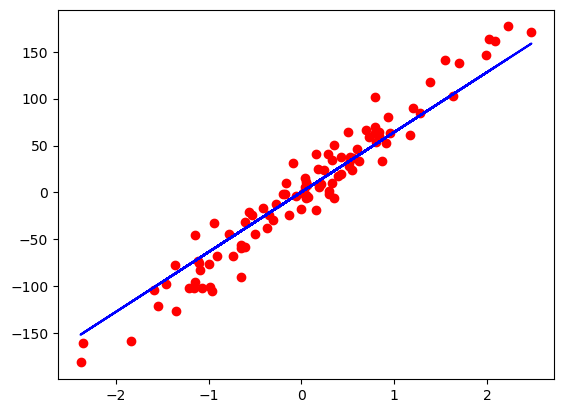

In [6]:
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

## Foot Notes

### 1. sklearn.datasets.make_regression

- Generate a random regression problem.

- The input set can either be well conditioned (by default) or have a low rank-fat tail singular profile.

- The output is generated by applying a (potentially biased) random linear regression model with n_informative nonzero regressors to the previously generated input and some gaussian centered noise with some adjustable scale.
  - noise - The standard deviation of the gaussian noise applied to the output.
  - random_state - Pass an int for reproducible output across multiple function calls

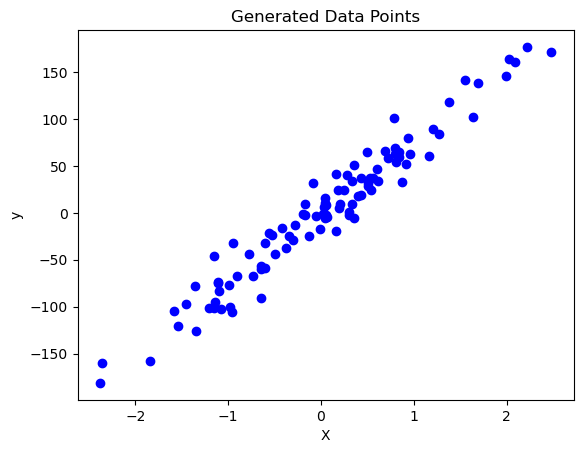

In [7]:
# Generate the data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# Plot the data points
plt.scatter(X_numpy, y_numpy, color='blue', label='Data Points')

# Add labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Data Points')

# Show the plot
plt.show()

### 2. Boath .size() and .Shape has same outputs?

In [8]:
a = torch.randn((5, 3))
print(a.size(), a.shape)

torch.Size([5, 3]) torch.Size([5, 3])


### 3. model.parameters() contains w, b values.

In [9]:
print(model.parameters())
[w, b] = model.parameters()

print(type(w[0][0]), type(w[0]), type(w))

print(w)
print(b)
print(w[0][0].item())

<generator object Module.parameters at 0x17b637040>
<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.nn.parameter.Parameter'>
Parameter containing:
tensor([[63.9341]], requires_grad=True)
Parameter containing:
tensor([0.4075], requires_grad=True)
63.934059143066406


### 4. Why do we need X and y tensors to be of type np.floate32?

- Answer - 
In PyTorch, if you create a tensor using torch.randn() or any other similar method, the default data type for the tensor will be torch.float32 (32-bit floating point). This is suitable for most applications and allows for efficient computation on modern GPUs.

### 5. .detach() on a model output

- detach the tensor from the computation graph. It essentially creates a new tensor that does not require gradients. This is often done when you don't need gradients to be computed for a particular tensor, such as in inference.